In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [80]:
df = pd.read_csv("Data/RiyadhVillas.csv")
df

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244,...,1,1,1,0,1,0,0,1,1,2300000
1,1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322,...,1,1,1,1,1,0,0,1,1,3000000
2,2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,NaN,350,...,0,1,0,1,0,0,1,1,1,2600000
3,3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350,...,1,1,0,0,1,0,1,1,1,2600000
4,6,فيلا,الرياض,حي العارض,غربية,4,1,5+,NaN,270,...,1,1,1,0,0,0,0,1,0,2800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,779,فيلا,الرياض,حي الفاروق,جنوبية,4,1,4,16.0,756,...,1,0,0,0,0,0,0,0,0,3300000
703,780,فيلا,الرياض,حي الربوة,ثلاث شوارع,7+,2,5+,12.0,868,...,1,1,1,1,1,0,0,1,0,4000000
704,781,فيلا,الرياض,حي الربوة,شمالية,4,2,4,20.0,1601,...,1,1,1,1,1,1,0,1,0,6564100
705,782,فيلا,الرياض,حي الخالدية,شمالية شرقية,5,2,5+,15.0,480,...,1,0,0,0,0,0,0,0,0,1200000


In [81]:
df.isnull().sum()

Unnamed: 0          0
نوع العقار          0
المدينة             0
الحي                0
الواجهة             0
عدد الغرف           0
عدد الصالات        16
عدد الحمامات        0
عرض الشارع        325
المساحة             0
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [82]:
df['عدد الصالات']=df['عدد الصالات'].fillna(method='ffill')

In [83]:
df.isnull().sum()

Unnamed: 0          0
نوع العقار          0
المدينة             0
الحي                0
الواجهة             0
عدد الغرف           0
عدد الصالات         0
عدد الحمامات        0
عرض الشارع        325
المساحة             0
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [84]:
df.head()

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244,...,1,1,1,0,1,0,0,1,1,2300000
1,1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322,...,1,1,1,1,1,0,0,1,1,3000000
2,2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,NaN,350,...,0,1,0,1,0,0,1,1,1,2600000
3,3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350,...,1,1,0,0,1,0,1,1,1,2600000
4,6,فيلا,الرياض,حي العارض,غربية,4,1,5+,NaN,270,...,1,1,1,0,0,0,0,1,0,2800000


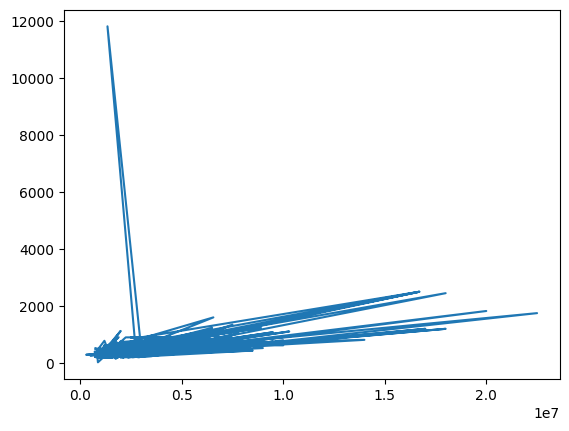

In [85]:
plt.plot(df['السعر الاجمالي'], df['المساحة'])

In [86]:
df.loc[(df['المساحة'] > 5000)]

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
128,150,فيلا,الرياض,حي العارض,غربية,3,2,5+,NaN,11811,...,1,1,0,0,0,0,0,0,0,1350000


In [87]:
df.drop(128, inplace=True) 

In [88]:
df.loc[(df['المساحة'] > 5000)]

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي


In [40]:
df.head()

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244,...,1,1,1,0,1,0,0,1,1,2300000
1,1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322,...,1,1,1,1,1,0,0,1,1,3000000
2,2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,NaN,350,...,0,1,0,1,0,0,1,1,1,2600000
3,3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350,...,1,1,0,0,1,0,1,1,1,2600000
4,6,فيلا,الرياض,حي العارض,غربية,4,1,5+,NaN,270,...,1,1,1,0,0,0,0,1,0,2800000


In [89]:
df['عدد الحمامات'] = df['عدد الحمامات'].str[0:1]
df['عدد الغرف'] = df['عدد الغرف'].str[0:1]
df['عدد الصالات'] = df['عدد الصالات'].str[0:1]
df.head()

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,0,فيلا,الرياض,حي العارض,جنوبية,6,3,5,NaN,244,...,1,1,1,0,1,0,0,1,1,2300000
1,1,فيلا,الرياض,حي العارض,جنوبية,6,4,5,NaN,322,...,1,1,1,1,1,0,0,1,1,3000000
2,2,فيلا,الرياض,حي العارض,جنوبية,3,2,5,NaN,350,...,0,1,0,1,0,0,1,1,1,2600000
3,3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350,...,1,1,0,0,1,0,1,1,1,2600000
4,6,فيلا,الرياض,حي العارض,غربية,4,1,5,NaN,270,...,1,1,1,0,0,0,0,1,0,2800000


In [90]:
df['نوع العقار'].value_counts()

نوع العقار
فيلا    706
Name: count, dtype: int64

In [91]:
df['الواجهة'].value_counts()

الواجهة
شمالية          180
جنوبية          157
غربية           140
شرقية           137
شمالية شرقية     25
جنوبية غربية     25
شمالية غربية     21
جنوبية شرقية     17
ثلاث شوارع        4
Name: count, dtype: int64

In [92]:
df.shape

(706, 21)

In [93]:
dt = pd.get_dummies(df, columns=['الحي'])
dt.head()

,Unnamed: 0,نوع العقار,المدينة,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,...,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
0,0,فيلا,الرياض,جنوبية,6,3,5,NaN,244,1,...,False,False,False,False,False,False,False,False,False,False
1,1,فيلا,الرياض,جنوبية,6,4,5,NaN,322,1,...,False,False,False,False,False,False,False,False,False,False
2,2,فيلا,الرياض,جنوبية,3,2,5,NaN,350,1,...,False,False,False,False,False,False,False,False,False,False
3,3,فيلا,الرياض,جنوبية,4,4,4,NaN,350,1,...,False,False,False,False,False,False,False,False,False,False
4,6,فيلا,الرياض,غربية,4,1,5,NaN,270,1,...,False,False,False,False,False,False,False,False,False,False


In [94]:
dt = pd.get_dummies(dt, columns=['الواجهة'])
dt.head()

,Unnamed: 0,نوع العقار,المدينة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,فيلا,الرياض,6,3,5,NaN,244,1,1,...,False,False,True,False,False,False,False,False,False,False
1,1,فيلا,الرياض,6,4,5,NaN,322,1,1,...,False,False,True,False,False,False,False,False,False,False
2,2,فيلا,الرياض,3,2,5,NaN,350,1,0,...,False,False,True,False,False,False,False,False,False,False
3,3,فيلا,الرياض,4,4,4,NaN,350,1,1,...,False,False,True,False,False,False,False,False,False,False
4,6,فيلا,الرياض,4,1,5,NaN,270,1,1,...,False,False,False,False,False,False,False,False,False,True


In [95]:
dt.drop(['نوع العقار', 'المدينة', 'عرض الشارع'], axis=1, inplace=True) 

In [96]:
dt.head()

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,6,3,5,244,1,1,1,1,0,...,False,False,True,False,False,False,False,False,False,False
1,1,6,4,5,322,1,1,1,1,1,...,False,False,True,False,False,False,False,False,False,False
2,2,3,2,5,350,1,0,1,0,1,...,False,False,True,False,False,False,False,False,False,False
3,3,4,4,4,350,1,1,1,0,0,...,False,False,True,False,False,False,False,False,False,False
4,6,4,1,5,270,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,True


In [97]:
dt.replace({False:0, True:1}, inplace= True)
dt.head()

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,6,3,5,244,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,6,4,5,322,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2,3,2,5,350,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,4,4,4,350,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6,4,1,5,270,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
dt.drop(['السعر الاجمالي'], axis=1)

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,6,3,5,244,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,6,4,5,322,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2,3,2,5,350,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,4,4,4,350,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6,4,1,5,270,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,779,4,1,4,756,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
703,780,7,2,5,868,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
704,781,4,2,4,1601,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
705,782,5,2,5,480,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [104]:
dt['السعر الاجمالي'] = df['السعر الاجمالي']
dt.head()

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,6,3,5,244,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,6,4,5,322,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2,3,2,5,350,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,4,4,4,350,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6,4,1,5,270,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [106]:
dt['السعر الاجمالي']

0      2300000
1      3000000
2      2600000
3      2600000
4      2800000
        ...   
702    3300000
703    4000000
704    6564100
705    1200000
706    2100000
Name: السعر الاجمالي, Length: 706, dtype: int64

In [109]:
dt.columns

Index(['Unnamed: 0', 'عدد الغرف', 'عدد الصالات', 'عدد الحمامات', 'المساحة',
       'درج صالة', 'مطبخ', 'غرفة خادمة', 'غرفة سائق', 'ملحق',
       ...
       'الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل ', 'الواجهة_ثلاث شوارع',
       'الواجهة_جنوبية', 'الواجهة_جنوبية شرقية', 'الواجهة_جنوبية غربية',
       'الواجهة_شرقية', 'الواجهة_شمالية', 'الواجهة_شمالية شرقية',
       'الواجهة_شمالية غربية', 'الواجهة_غربية'],
      dtype='object', length=119)

In [110]:
dt.head()

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,6,3,5,244,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,6,4,5,322,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2,3,2,5,350,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,4,4,4,350,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6,4,1,5,270,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [118]:
x = dt.drop('السعر الاجمالي', axis=1)
y = dt['السعر الاجمالي']

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [162]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state =42)

In [272]:
model3 = RandomForestRegressor()
model3.fit(x1train, y1train)

C:\Users\walee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [273]:
pred3 = model3.predict(x1test).astype('int32')

In [274]:
pred3

array([ 2566200,  1273991,  5321940,  4005750,  1731800, 18189000,
        2263202,  2567000,  2949300,  2195200,  1179406,  4476100,
        1706100,  1763600,  5057840,  3692200,  5627800,   861250,
         856000, 11457641,  1981600,  2947800,  2376100,  2694800,
        1714400,  2646900,  1848509,  1589300,   999250,  2635000,
        8469250,  1301000,  5412000,  2613900,  2182800,  2914840,
        2329400,  1662216,  1087600,  1020600,  1516600,  2137303,
        2552780, 11387641,   875700,  1667600,  2182900,  1942300,
        4442700,  1893700,  2675000,  3389000,  3107250,  2018800,
        1772500,  1459600,  6686130,  1924600,  3399500,  2184239,
        1588602,   940600,  2073202,  1067800,  1476204,  1831200,
        1683000,  1165100,  3295080,  1339700,  2123700,  2620000,
        5097000,  1859200,  1816025,  8209190,  5606250,   863850,
        1141700,  1269504,  2384898,  1966200,  2918800,  3593940,
        1333902,   950650,  1347902,  1539300,  1880700,  1684

In [276]:
df7 = pd.DataFrame(data={'Predicted Values': pred3.flatten(), 'Actual Values': y1test.flatten()})
df7.head(40)

,Predicted Values,Actual Values
0,2566200,1100000
1,1273991,1200000
2,5321940,5500000
3,4005750,5000000
4,1731800,1400000
5,18189000,16700000
6,2263202,2000000
7,2567000,4300000
8,2949300,3400000
9,2195200,2200000


In [281]:
testscore3 = model3.score(x1test, y1test)
print('test score: ',testscore3)

trainscore3 = model3.score(x1train, y1train)
print('train score: ',trainscore3)

test score:  0.852949846924705
train score:  0.9687814115633097


In [282]:
model3.score(x1test, y1test)

0.852949846924705